In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Scrapper 
#Uses BeautifulSoup : Python library designed for quick turnaround projects like screen-scraping. Three features make it powerful:

import re
import csv 
import pickle
import time
import pprint
from collections import Counter
from urllib.request import urlopen
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import pandas as pd

#scrapes data from given URL 
#returns dictionary with key as date and 
#value as the article
def scrapper(keyword, URL):
  date_sentiments = {}
  article_text = {}
  counter = 1
  for i in range(1,9):
    page = urlopen(URL+keyword+'\?page='+str(i)).read()
    soup = BeautifulSoup(page, features='html.parser')
    posts = soup.findAll("div", {"class":"media-body"})
    for post in posts: 
      time.sleep(1)
      url = post.a['href']
      date = post.time.text
      print("Article count:", counter)
      print("Date:", date)
      print("URL: ", url[:100]+'...')
      counter += 1
      try:
        link_page = urlopen(url).read()
      except:
        url = url[:-2]
        link_page = urlopen(url).read()
      link_soup = BeautifulSoup(link_page)
      sentences = link_soup.findAll('p')
      passage = ""
      for sentence in sentences:
        passage += sentence.text
      article_text.setdefault(date, []).append(passage)
      if(counter>=10):
        break
  articles = {}
  for k,v in article_text.items():
    articles[datetime.strptime(k, '%d %b %Y').date()+ timedelta(days=1)] = v

  return articles

URL = 'https://www.businesstimes.com.sg/search/'
articles = scrapper("shell", URL)


# convert dict into pandas dataframe
# deal with articles that appear on same date
df = pd.DataFrame.from_dict(articles, columns=['1','2'], orient='index')
df['content'] = df['1']+' '+ df['2'].fillna('')
df.drop(columns=['1','2'], inplace=True)


Article count: 1
Date: 02 Nov 2019
URL:  https://www.businesstimes.com.sg/companies-markets/sembmarine-bags-job-on-shell-floating-production-...
Article count: 2
Date: 01 Nov 2019
URL:  https://www.businesstimes.com.sg/companies-markets/sembmarine-bags-shells-floating-production-unit-c...
Article count: 3
Date: 01 Nov 2019
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-warns-of-weak-economic-outlook-despite-bum...
Article count: 4
Date: 29 Oct 2019
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-reports-disruption-at-singapore-refinery-p...
Article count: 5
Date: 23 Oct 2019
URL:  https://www.businesstimes.com.sg/government-economy/us-house-approves-bill-exposing-shell-company-ow...
Article count: 6
Date: 15 Oct 2019
URL:  https://www.businesstimes.com.sg/government-economy/gic-kkr-shell-out-35b-pesos-for-425-stake-in-big...
Article count: 7
Date: 05 Oct 2019
URL:  https://www.businesstimes.com.sg/energy-commodities/chevron-buys-40-stake-in-three-mexico

OSError: ignored

In [0]:
# pickles dataframe and saves it in a data folder
f = open('/content/df.pkl', 'wb')
pickle.dump(df, f)
f.close()

# Natural Language Processing Pipeline

 **Tokenisation**
 we use spaCy’s standard here, which is very advanced but also pragmatic. 

 **Lemmatisation**
 fancy expression for converting a word to its root. Because spaCy can also remove very common words — called stop-words — which often convey very little meaning (e.g. “on”, that”, “it” etc). So we not only lemmatised the tokens, but also performed stop-word removal.
 SpaCy can also extract noun chunks, i.e. expressions and common phrases that have a different or additional meaning when they occur together. 

 **Text** → **sentences**
 spaCy to split a body of text into sentences. 



In [0]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 147.3MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=6a4d2161a3d2de4e3447aa0586a93f39084443b2151cb3a40433a2094063c0bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-b20qc9ut/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [24]:
import spacy
import en_core_web_lg
spacy_nlp = en_core_web_lg.load()
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
spacy.prefer_gpu()

import matplotlib.pyplot as plt
import seaborn as sns

# NLP pipeline components
spacy_nlp.pipe_names

sample = df.iloc[2]['content']
print(sample[:512])

#create Spacy object and run NLP pipeline
doc = spacy_nlp(sample)

#before
tokens = [token.text for token in doc]
print(tokens[:25])

[SINGAPORE] Royal Dutch Shell said on Tuesday that its refinery-petrochemical complex on Bukom Island in Singapore encountered "an unplanned operational disruption" last week"We can confirm there was flaring at the Pulau Bukom Manufacturing Site on October 24," a company spokeswoman said in an e-mail. Flaring is a major safety device used to keep the plant safe during unplanned operational disruptions, she added.Shell declined to say which unit was affected. Bukom is the largest wholly owned Shell refinery 
['[', 'SINGAPORE', ']', 'Royal', 'Dutch', 'Shell', 'said', 'on', 'Tuesday', 'that', 'its', 'refinery', '-', 'petrochemical', 'complex', 'on', 'Bukom', 'Island', 'in', 'Singapore', 'encountered', '"', 'an', 'unplanned', 'operational']


In [25]:
#after 
tokens = [token.lemma_ for token in doc if not token.is_stop]
print(tokens[:25])

['[', 'SINGAPORE', ']', 'Royal', 'Dutch', 'Shell', 'say', 'Tuesday', 'refinery', '-', 'petrochemical', 'complex', 'Bukom', 'Island', 'Singapore', 'encounter', '"', 'unplanned', 'operational', 'disruption', '"', 'week"we', 'confirm', 'flare', 'Pulau']


In [26]:
#noun chunks
chunks = [chunk.text for chunk in doc.noun_chunks]
print(chunks[3:15])

['its refinery-petrochemical complex', 'Bukom Island', 'Singapore', '"an unplanned operational disruption', '" last week"We', 'the Pulau Bukom Manufacturing Site', 'October', '" a company spokeswoman', 'an e-mail', 'a major safety device', 'the plant', 'unplanned operational disruptions']


In [27]:
#sentenciser 
sentences = [sent.string.strip() for sent in doc.sents]
pprint.pprint(sentences[:3])

['[SINGAPORE]',
 'Royal Dutch Shell said on Tuesday that its refinery-petrochemical complex on '
 'Bukom Island in Singapore encountered "an unplanned operational disruption" '
 'last week"We can confirm there was flaring at the Pulau Bukom Manufacturing '
 'Site on October 24," a company spokeswoman said in an e-mail.',
 'Flaring is a major safety device used to keep the plant safe during '
 'unplanned operational disruptions, she added.']


In [28]:
#Named-entity Recognition (NER)

NER_labels = [(X.text, X.label_, spacy.explain(X.label_)) for X in doc.ents]
NER_labels[:10]

[('SINGAPORE', 'GPE', 'Countries, cities, states'),
 ('Royal Dutch Shell', 'ORG', 'Companies, agencies, institutions, etc.'),
 ('Tuesday', 'DATE', 'Absolute or relative dates or periods'),
 ('Bukom Island',
  'LOC',
  'Non-GPE locations, mountain ranges, bodies of water'),
 ('Singapore', 'GPE', 'Countries, cities, states'),
 ('the Pulau Bukom Manufacturing Site',
  'ORG',
  'Companies, agencies, institutions, etc.'),
 ('October 24', 'DATE', 'Absolute or relative dates or periods'),
 ('Shell', 'ORG', 'Companies, agencies, institutions, etc.'),
 ('Bukom', 'PERSON', 'People, including fictional'),
 ('Shell', 'ORG', 'Companies, agencies, institutions, etc.')]

In [30]:
#highlights named entities in a document
displacy.render(scalpy_nlp(str(sentences[:13])), jupyter=True, style='ent')

# Named-entity Recognition

Apply NER to all articles:
We pass the concatenated string directly into spaCy to create a spaCy object on which to perform further NER analysis.

In [37]:
# concatenate all rows of dataframe
whole = spacy_nlp(df.content.str.cat(sep=' '))

#categories and number of occurences 
labels = [spacy.explain(x.label_) for x in whole.ents]
Counter(labels)

#most frequent named entities
items = [x.text for x in whole.ents]
Counter(items).most_common(10)

#apply lemmatisation + stopword to remove all words; show the most frequent
words = [token.lemma_ for token in whole.doc if token.is_stop != True
         and token.is_punct != True]
Counter(words).most_common(10)

[('Shell', 67),
 ('say', 53),
 ('Singapore', 39),
 ('year', 35),
 ('oil', 34),
 ('company', 34),
 ('South', 33),
 ('Korea', 32),
 ('cent', 31),
 ('billion', 29)]

# Sentiment Algorithms

Out-of-the-box algorithms that come with TextBlob and NLTK packages 

In [45]:
!pip install dictionaries

In [49]:
from textblob import TextBlob

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

import dictionaries 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
df['spacy_tokens'] = df['content'].apply(spacy_nlp)

def spacy_lemma_stopwords(text):
  return [token.lemma_ for token in text if not token.is_stop]

spacy_process = lambda x: spacy_lemma_stopwords(x)
df['spacy_processed'] = df.spacy_tokens.apply(spacy_process)

def spacy_to_string(text):
  return ' '.join(text)

spacy_to_str = lambda x: spacy_to_string(x)
df['spacy_string'] = df.spacy_processed.apply(spacy_to_str)

#apply sentiment algorithms
TB = lambda x: round(TextBlob(x).sentiment.polarity, 3)
NLTK = lambda x: round(sia.polarity_scores(x)['compound'], 3)

df['TextBlob_spacy'] = df.spacy_string.apply(TB)
df['NLTK_spacy'] = df.spacy_string.apply(NLTK)

df.head()

,content,spacy_tokens,spacy_processed,spacy_string,TextBlob_spacy,NLTK_spacy
2019-11-03,SingaporeSEMBCORP Marine Rigs & Floaters has w...,"(SingaporeSEMBCORP, Marine, Rigs, &, Floaters,...","[SingaporeSEMBCORP, Marine, Rigs, &, Floaters,...",SingaporeSEMBCORP Marine Rigs & Floaters win c...,0.153,0.949
2019-11-02,SEMBCORP Marine Rigs & Floaters has won a cont...,"(SEMBCORP, Marine, Rigs, &, Floaters, has, won...","[SEMBCORP, Marine, Rigs, &, Floaters, win, con...",SEMBCORP Marine Rigs & Floaters win contract S...,0.025,0.989
2019-10-30,[SINGAPORE] Royal Dutch Shell said on Tuesday ...,"([, SINGAPORE, ], Royal, Dutch, Shell, said, o...","[[, SINGAPORE, ], Royal, Dutch, Shell, say, Tu...",[ SINGAPORE ] Royal Dutch Shell say Tuesday re...,0.078,0.765
2019-10-24,[WASHINGTON] The US House of Representatives o...,"([, WASHINGTON, ], The, US, House, of, Represe...","[[, WASHINGTON, ], House, Representatives, Tue...",[ WASHINGTON ] House Representatives Tuesday a...,-0.031,-0.980
2019-10-16,SINGAPORE’S sovereign wealth fund GIC and priv...,"(SINGAPORE, ’S, sovereign, wealth, fund, GIC, ...","[SINGAPORE, ’s, sovereign, wealth, fund, GIC, ...",SINGAPORE ’s sovereign wealth fund GIC private...,0.072,0.994


# Visualising Scores and Comparing results



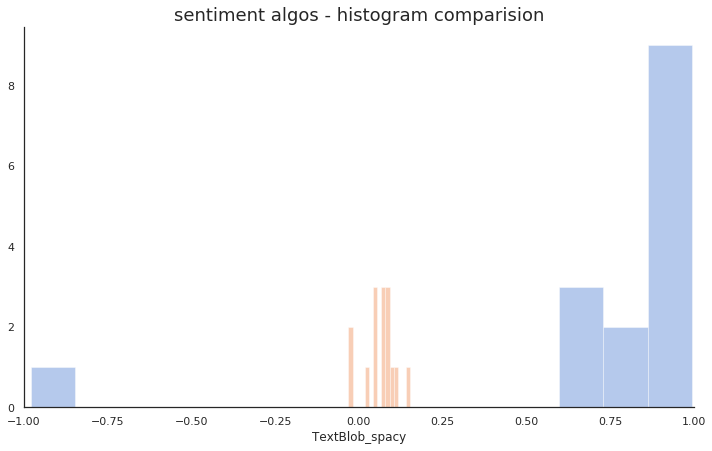

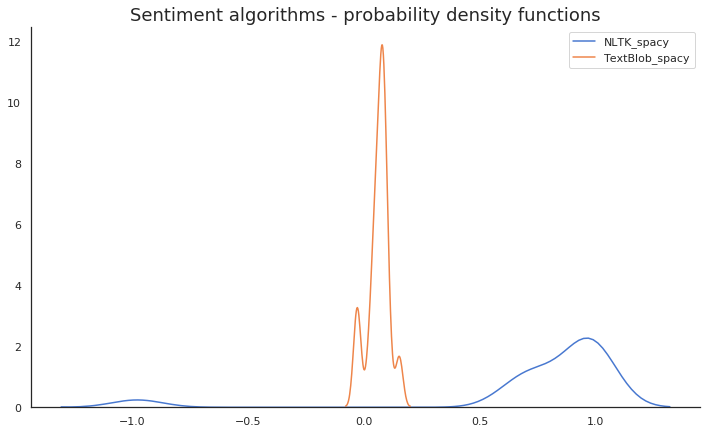

In [57]:
# layout and design params
sns.set(style='white', palette='muted', color_codes=True)

#bar plot with sentiment over time
plt.figure(figsize=(12,7))
ax = sns.distplot(df.NLTK_spacy, bins=15, kde=False)
ax2 = sns.distplot(df.TextBlob_spacy, bins=15, kde=False)
plt.title('sentiment algos - histogram comparision', fontsize=18)
ax.set_xlim(-1,1)
sns.despine()

#PDF of sentiment distribution
plt.figure(figsize=(12,7))
ax = sns.kdeplot(df.NLTK_spacy)
ax2 = sns.kdeplot(df.TextBlob_spacy)
plt.title('Sentiment algorithms - probability density functions', fontsize=18)
sns.despine()